<a href="https://colab.research.google.com/github/youngcheolman/practice/blob/main/%EC%88%98%EA%B0%95%EC%83%9D%EB%93%A4%EC%9D%B4_%EA%B0%80%EC%9E%A5_%EB%A7%8E%EC%9D%B4_%ED%98%B9%EC%9D%80_%EA%B0%80%EC%9E%A5_%EC%A0%81%EA%B2%8C_%EB%93%A3%EB%8A%94_%EC%8B%9C%EA%B0%84%EA%B3%BC_%EC%9A%94%EC%9D%BC%EC%9D%84_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D%EC%9C%BC%EB%A1%9C_%EC%B0%BE%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 목표 : 수강생들이 가장 많이 혹은 가장 적게 듣는 시간과 요일을 데이터 분석으로 찾기

In [2]:
import pandas as pd

df = pd.read_csv('access_detail.csv')
df.head()

,lecture_id,access_date,user_id
0,5f266927e67b8fcf4340c087,2020-08-18 23:15:34,78ff837c7cea9f33
1,5f266927e67b8fcf4340c087,2020-08-04 11:56:07,2987aa87d23c9e3d
2,5f266927e67b8fcf4340c087,2020-08-03 12:19:58,23182525e9996864
3,5f266927e67b8fcf4340c087,2020-08-08 15:15:16,ffb6913842d617a5
4,5f266927e67b8fcf4340c087,2020-08-04 10:30:59,2c6822e7e833dc95


In [3]:
# 시간과 요일 데이터 분석을 위한 전처리
# 문자열로 인식하는 access_date를 시계열로 바꿈

format='%Y-%m-%dT%H:%M:%S.%f'
df['access_date_time'] = pd.to_datetime(df['access_date'], format='mixed')

In [4]:
#시계열 데이터를 바탕으로 새로운 컬럼 '요일'을 추가함
df['access_date_time_weekday'] = df['access_date_time'].dt.day_name()
df.tail(5)

,lecture_id,access_date,user_id,access_date_time,access_date_time_weekday
8123,5f36558829f38171335a890a,2020-09-03 22:37:33,6da398d852411234,2020-09-03 22:37:33,Thursday
8124,5f36558829f38171335a890a,2020-08-29 11:09:58,6da398d852411235,2020-08-29 11:09:58,Saturday
8125,5f36558829f38171335a890a,2020-09-06 12:25:25,6da398d852411236,2020-09-06 12:25:25,Sunday
8126,5f36558829f38171335a890a,2020-09-07 22:11:20,6da398d852411237,2020-09-07 22:11:20,Monday
8127,5f36558829f38171335a890a,2020-08-22 21:12:23,6da398d852411238,2020-08-22 21:12:23,Saturday


In [5]:
#요일별로 수강한 학생들의 수를 구하기
weeks = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdata = df.groupby('access_date_time_weekday')['user_id'].count()
weekdata

,user_id
access_date_time_weekday,
Friday,859
Monday,1354
Saturday,926
Sunday,1541
Thursday,937
Tuesday,1624
Wednesday,887


In [6]:
# [날짜 컬럼].dt.hour 을 사용하여 해당 날짜의 시간 값을 가져오기

df['access_date_time_hour'] = df['access_date_time'].dt.hour

hourdata = df.groupby('access_date_time_hour')['user_id'].count()
hourdata = hourdata.sort_index()
hourdata

,user_id
access_date_time_hour,
0,343
1,197
2,144
3,123
4,65
5,50
6,62
7,84
8,126


In [7]:
import matplotlib.pyplot as plt
import numpy as np
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

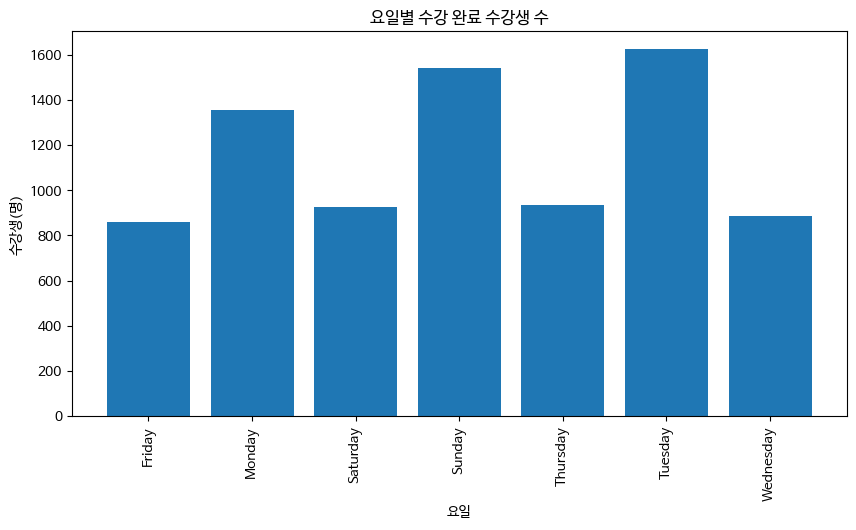

In [8]:
####요일별 수강생 수 바 그래프 그리기#########

#그래프 사이즈
plt.figure(figsize=(10,5))
plt.rc('font', family='NanumBarunGothic')

#그래프 x축 y축
plt.bar(weekdata.index, weekdata)

#그래프 명
plt.title('요일별 수강 완료 수강생 수')

#그래프 x축 레이블
plt.xlabel('요일')

#그래프 y축 레이블
plt.ylabel('수강생(명)')

#x축 레이블을 90도로 변환
plt.xticks(rotation=90)

#그래프 출력
plt.show()

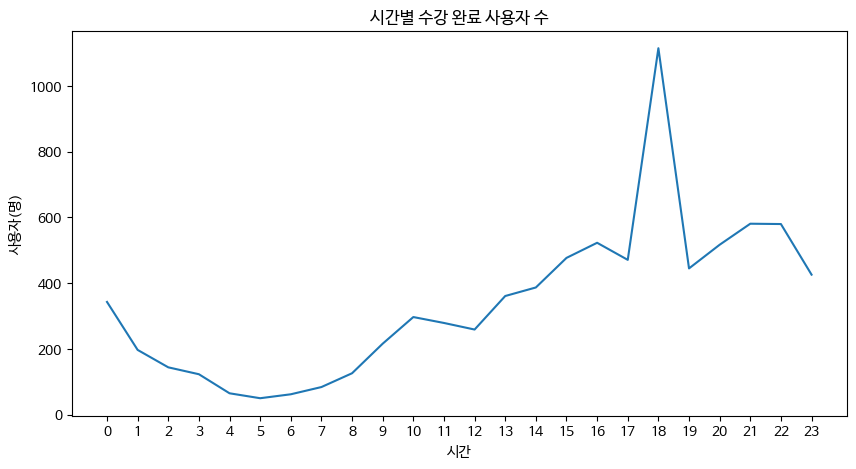

In [9]:
#그래프 사이즈 변경
plt.figure(figsize=(10,5))
plt.rc('font', family='NanumBarunGothic')

#그래프 x축 y축
plt.plot(hourdata.index, hourdata)

#그래프 명
plt.title('시간별 수강 완료 사용자 수')

#그래프 x축 레이블
plt.xlabel('시간')

#그래프 y축 레이블
plt.ylabel('사용자(명)')

#x축 눈금 표시 하기
plt.xticks(np.arange(24))

#그래프 출력
plt.show()

In [10]:
#피벗테이블 만들기
#columns : 열에 들어 가는 부분
#index : 행에 들어가는 부분
#aggfunc : 데이터 축약 시 사용할 함수
sparta_data_pivot_table = pd.pivot_table(df, values='user_id',
                       index=['access_date_time_weekday'],
                       columns=['access_date_time_hour'],
                       aggfunc="count").agg(weeks)
sparta_data_pivot_table

access_date_time_hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Monday,67,31,30,27,3,5,19,14,28,22,...,62,55,101,84,68,86,119,117,118,86
Tuesday,51,27,17,12,6,3,6,14,20,26,...,41,56,68,34,713,56,66,97,92,86
Wednesday,47,19,12,8,10,15,14,3,22,20,...,34,68,40,68,80,71,56,75,82,52
Thursday,39,30,10,15,14,2,5,11,10,18,...,46,69,80,60,61,61,70,62,94,65
Friday,72,36,20,9,5,1,5,2,10,34,...,44,61,57,70,67,51,45,45,47,33
Saturday,31,17,10,22,7,4,4,19,9,51,...,72,78,66,82,55,26,47,70,52,37
Sunday,36,37,45,30,20,20,9,21,27,45,...,88,90,111,73,71,94,114,115,95,67


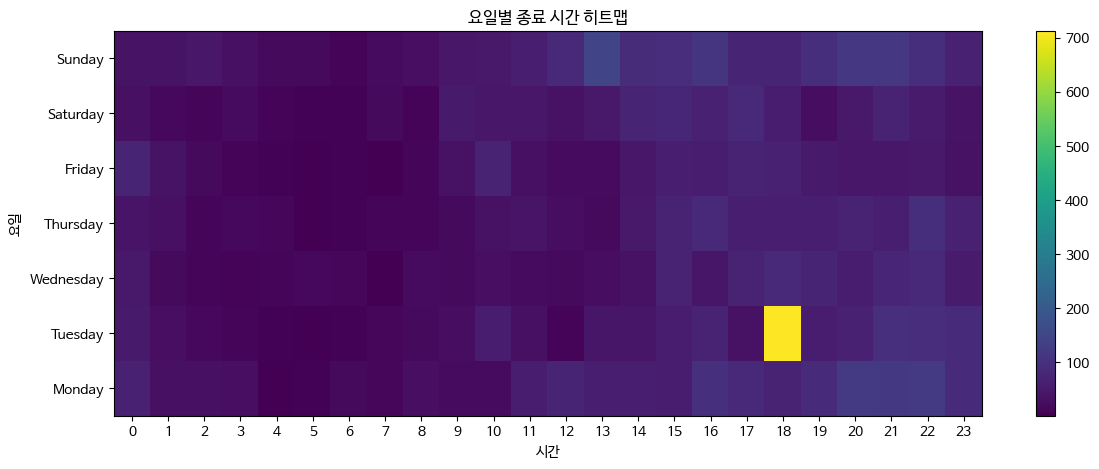

In [11]:
#그래프 사이즈 변경
plt.figure(figsize=(14,5))

#pcolor를 이용하여 heatmap 그리기
plt.pcolor(sparta_data_pivot_table)

#히트맵에서의 x축
plt.xticks(np.arange(0.5, len(sparta_data_pivot_table.columns), 1), sparta_data_pivot_table.columns)

#히트맵에서의 y축
plt.yticks(np.arange(0.5, len(sparta_data_pivot_table.index), 1), sparta_data_pivot_table.index)

#그래프 명
plt.title('요일별 종료 시간 히트맵')

#그래프 x축 레이블
plt.xlabel('시간')

#그래프 y축 레이블
plt.ylabel('요일')

#plt.colorbar() 명령어를 추가하면 그래프 옆에 숫자별 색상값을 나타내는 컬러바를 보여 줍니다
plt.colorbar()
plt.show()

일주일 중 화요일 그리고 일요일에 수강이 많이 이뤄졌고, 금요일과 수요일에 수강 하는 인원이 가장 적었습니다.

이어서 일별 접속 시간의 추이를 살펴보았습니다. 저녁시간 쯤인 18시에 접속이 폭발적으로 많았고, 밤 21시쯤에 감소하는 추세를 보였습니다.

요일 별, 시간대별로도 살펴보았더니 화요일 18시에 가장 많은 접속자가 있다는 것을 확인할 수 있었습니다.

그리하여, 고객 관리 문자는 가장 수강을 많이 한 화요일,일요일 저녁쯤에 독려 문자를 가장 수강을 적게 한 금요일 수요일 오전 시간에 동기부여 문자를 보내보는 것을 제안해보겠습니다.